<a href="https://colab.research.google.com/github/atharvakale31/PR_ML/blob/master/Mixture_Models_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import theano.tensor as tt
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

In [ ]:
sns.set()
np.random.seed(33)

In [ ]:
normal_data_a = np.random.normal(size = 700, loc = 40, scale = 15)
normal_data_b = np.random.normal(size = 700, loc = 75, scale = 5)
normal_data_c = np.random.normal(size = 300, loc = 100, scale = 7)
normal_data_d = np.random.normal(size = 300, loc = 130, scale = 12)

In [ ]:
df_normal_a = pd.DataFrame(data = normal_data_a, columns=['score']).assign(group = 'Group A')
df_normal_b = pd.DataFrame(data = normal_data_b, columns=['score']).assign(group = 'Group B')
df_normal_c = pd.DataFrame(data = normal_data_c, columns=['score']).assign(group = 'Group C')
df_normal_d = pd.DataFrame(data = normal_data_d, columns=['score']).assign(group = 'Group D')

score_data = pd.concat([df_normal_a, df_normal_b, df_normal_c, df_normal_d])

In [ ]:
score_data.reset_index(inplace=True)

In [ ]:
print(score_data) 

      index       score    group
0         0   51.826081  Group A
1         1   18.620557  Group A
2         2   22.036845  Group A
3         3   43.548918  Group A
4         4   17.277796  Group A
...     ...         ...      ...
1995    295  130.129009  Group D
1996    296  131.049016  Group D
1997    297  113.241903  Group D
1998    298  146.343219  Group D
1999    299  131.119454  Group D

[2000 rows x 3 columns]


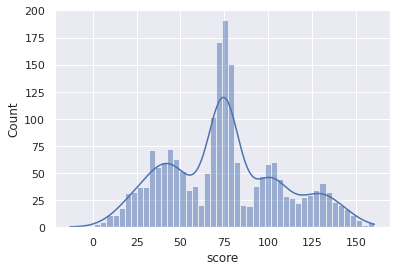

In [ ]:
sns.histplot(data = score_data,x = 'score',alpha = 0.5,bins = 50,kde = True)

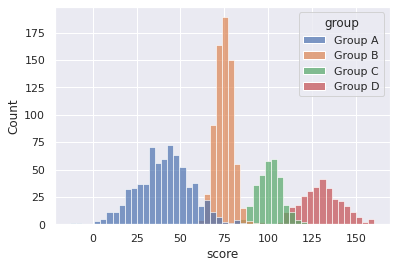

In [ ]:
sns.histplot(data = score_data,x = 'score',alpha = .7,bins = 50,hue = 'group')

In [ ]:
clusters = 4
with pm.Model() as model_mgp:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    means = pm.Normal('means',
                          mu=np.linspace(score_data['score'].min(), score_data['score'].max(), clusters),
                          sd=10, shape=clusters,
                          transform=pm.distributions.transforms.ordered)
    sd = pm.HalfNormal('sd', sd=10)
    order_means = pm.Potential('order_means',tt.switch(means[1]-means[0] < 0,-np.inf, 0))
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=score_data['score'])
    trace_mgp = pm.sample(1000, random_seed=123)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 197 seconds.
The acceptance probability does not match the target. It is 0.935951323722054, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dd8486650>,
      dtype=object)

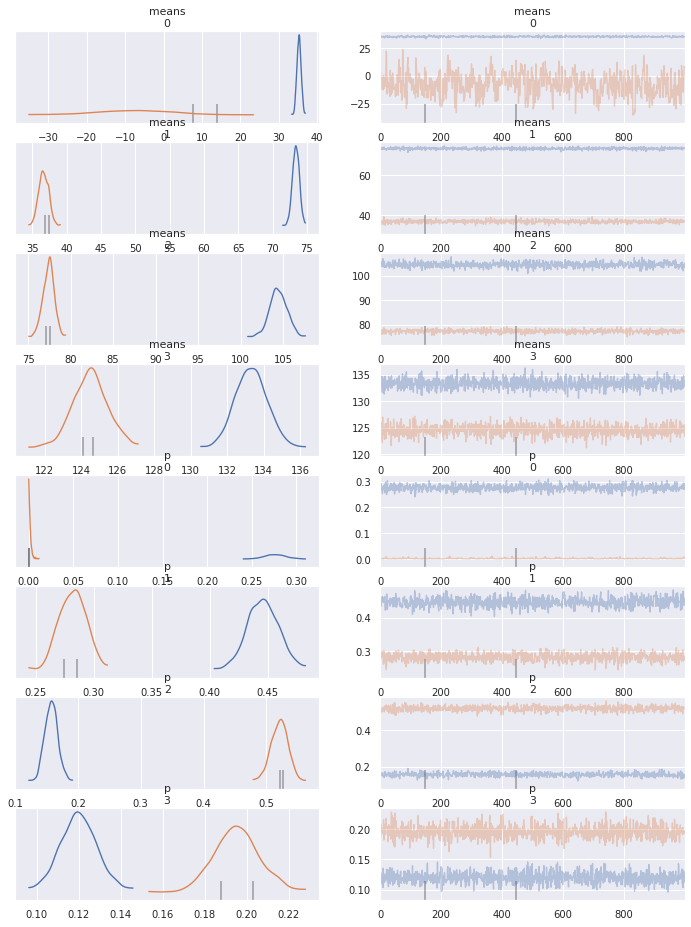

In [ ]:
varnames = ['means', 'p']
az.plot_trace(trace_mgp, varnames,compact=False)

In [ ]:
az.summary(trace_mgp, varnames)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],13.793,22.539,-19.133,36.507,15.256,12.896,3.0,63.0,1.83
means[1],55.025,18.391,35.642,74.236,12.947,10.951,3.0,88.0,1.83
means[2],90.924,13.567,76.207,105.861,9.541,8.065,3.0,62.0,1.83
means[3],128.921,4.509,123.122,134.771,3.124,2.624,3.0,83.0,1.83
p[0],0.139,0.138,0.000,0.290,0.097,0.082,3.0,143.0,1.83
p[1],0.364,0.083,0.264,0.466,0.058,0.049,3.0,110.0,1.83
p[2],0.339,0.182,0.140,0.539,0.128,0.108,3.0,72.0,1.83
p[3],0.158,0.039,0.107,0.213,0.027,0.022,3.0,67.0,1.83


/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1701: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  UserWarning,


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


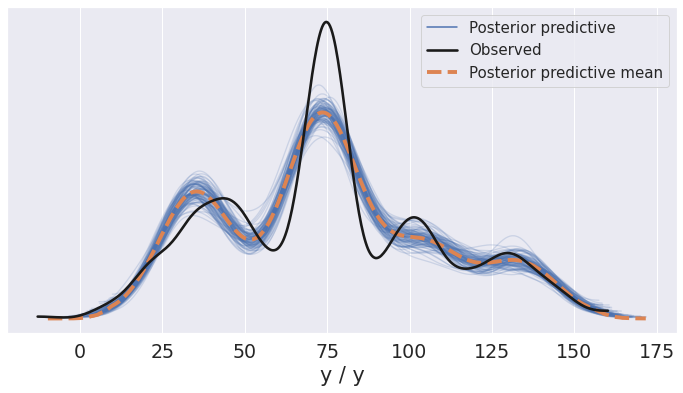

In [ ]:
y_ppc_t = pm.sample_posterior_predictive(trace_mgp, 100, model_mgp, random_seed=123)
y_pred_t = az.from_pymc3(trace=trace_mgp, posterior_predictive=y_ppc_t)
ax = az.plot_ppc(y_pred_t, figsize=(12, 6), mean=True)
ax.legend(fontsize=15)


In [ ]:
clusters = [3, 4, 5, 6]

models = []
traces = []
for cluster in clusters:
    with pm.Model() as model:
        p = pm.Dirichlet('p', a=np.ones(cluster))
        means = pm.Normal('means',
                          mu=np.linspace(score_data['score'].min(), score_data['score'].max(), cluster),
                          sd=10, shape=cluster,
                          transform=pm.distributions.transforms.ordered)
        sd = pm.HalfNormal('sd', sd=10)
        y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=score_data['score'])
        trace = pm.sample(1000, tune=2000, random_seed=123)
        traces.append(trace)
        models.append(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 104 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 264 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 132 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 692 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


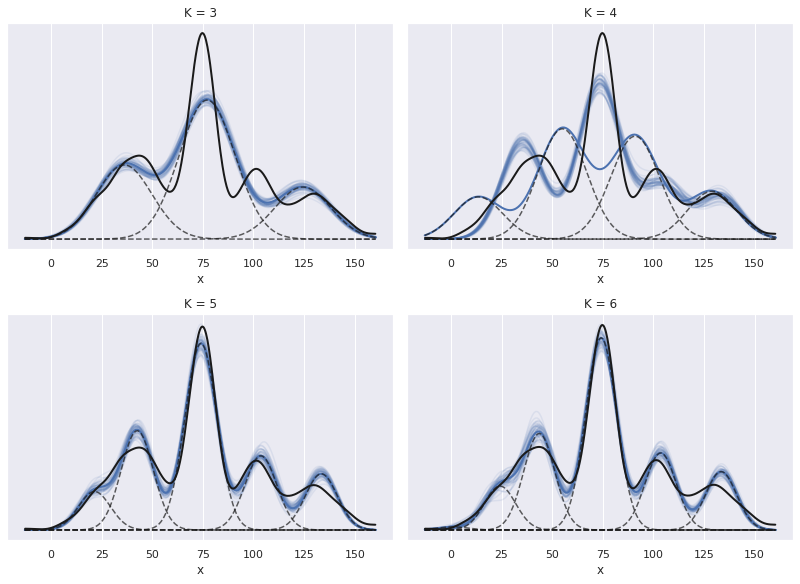

In [ ]:

_, ax = plt.subplots(2, 2, figsize=(11, 8), constrained_layout=True)
 
ax = np.ravel(ax)
x = np.linspace(score_data['score'].min(), score_data['score'].max(), 200)
for idx, trace_x in enumerate(traces):
    x_ = np.array([x] * clusters[idx]).T
 
    for i in range(50):
        i_ = np.random.randint(0, len(trace_x))
        means_y = trace_x['means'][i_]
        p_y = trace_x['p'][i_]
        sd = trace_x['sd'][i_]
        dist = stats.norm(means_y, sd)
        ax[idx].plot(x, np.sum(dist.pdf(x_) * p_y, 1), 'C0', alpha=0.1)
 
    means_y = trace_x['means'].mean(0)
    p_y = trace_x['p'].mean(0)
    sd = trace_x['sd'].mean()
    dist = stats.norm(means_y, sd)
    ax[idx].plot(x, np.sum(dist.pdf(x_) * p_y, 1), 'C0', lw=2)
    ax[idx].plot(x, dist.pdf(x_) * p_y, 'k--', alpha=0.7)
         
    az.plot_kde(score_data['score'], plot_kwargs={'linewidth':2, 'color':'k'}, ax=ax[idx])
    ax[idx].set_title('K = {}'.format(clusters[idx]))
    ax[idx].set_yticks([])
    ax[idx].set_xlabel('x')


In [ ]:
az.summary(traces[-1])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.007,0.007,0.000,0.020,0.001,0.000,72.0,410.0,1.04
p[1],0.093,0.012,0.073,0.116,0.003,0.002,22.0,127.0,1.07
p[2],0.205,0.015,0.178,0.236,0.002,0.001,57.0,160.0,1.04
p[3],0.408,0.012,0.386,0.430,0.000,0.000,769.0,848.0,1.00
p[4],0.163,0.009,0.148,0.181,0.000,0.000,378.0,880.0,1.00
p[5],0.124,0.008,0.108,0.139,0.000,0.000,1034.0,784.0,1.00
means[0],0.833,7.498,-11.797,13.041,1.717,1.233,21.0,114.0,1.08
means[1],24.242,1.987,21.038,28.166,0.425,0.305,18.0,157.0,1.08
means[2],43.619,0.874,42.125,45.315,0.136,0.097,45.0,701.0,1.05
means[3],74.191,0.319,73.603,74.773,0.010,0.007,1028.0,1602.0,1.01


https://www.kaggle.com/spscientist/students-performance-in-exams/code

In [ ]:
score= pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
score['avg']=(score['math score']+score['reading score']+score['writing score'])/3

In [ ]:
score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


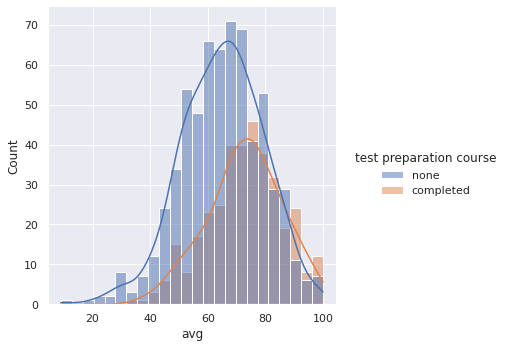

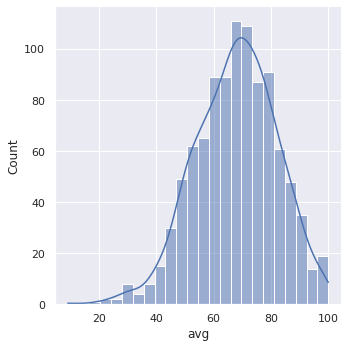

In [ ]:
sns.displot(data=score,x='avg',hue='test preparation course',kde=True)
sns.displot(data=score,x='avg',kde=True)

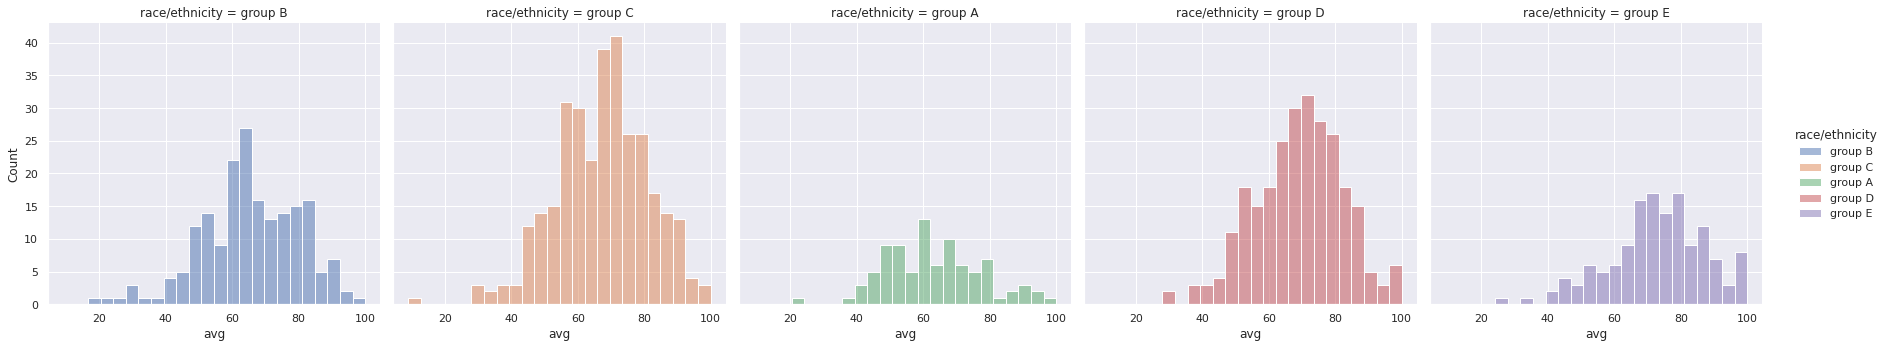

In [ ]:
sns.displot(data=score,x='avg',hue='race/ethnicity',col='race/ethnicity')

In [ ]:
clusters = [1, 2, 3, 4]

models = []
traces = []
for cluster in clusters:
    with pm.Model() as model:
        p = pm.Dirichlet('p', a=np.ones(cluster))
        means = pm.Normal('means',
                          mu=np.linspace(score['avg'].min(), score['avg'].max(), cluster),
                          sd=10, shape=cluster,
                          transform=pm.distributions.transforms.ordered)
        sd = pm.HalfNormal('sd', sd=10)
        y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=score['avg'])
        trace = pm.sample(1000, tune=2000, random_seed=123)
        traces.append(trace)
        models.append(model)

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/usr/local/lib/python3.7/dist-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/usr/local/lib/python3.7/dist-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/usr/local/lib/python3.7/dist-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph

Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 140 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9021381389262528, but should be close to 0.8. Try to increase the number of tuning steps.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 164 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 214 seconds.
There were 319 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.542910041956969, but should be close to 0.8. Try to increase the number of tuning steps.
There were 361 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.7/dist-packages/arviz/stats/density_utils.py:955: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.7/dist-packages/arviz/stats/density_utils.py (977)

File "../usr/local/lib/python3.7/dist-packages/arviz/stats/density_utils.py", line 977:
def histogram(data, bins, range_hist=None):
    <source elided>
    """
    hist, bin_edges = np.histogram(data, bins=bins, range=range_hist)
    ^

  @conditional_jit(cache=True)
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "histogram" was compiled in object mode without forceobj=True.

File "../usr/local/lib/python3.7/dist-packages/arviz/stats/density_utils.py", line 956:
@conditional_jit(cache=True)
def histogram(data, bins, range_hist=None):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packag

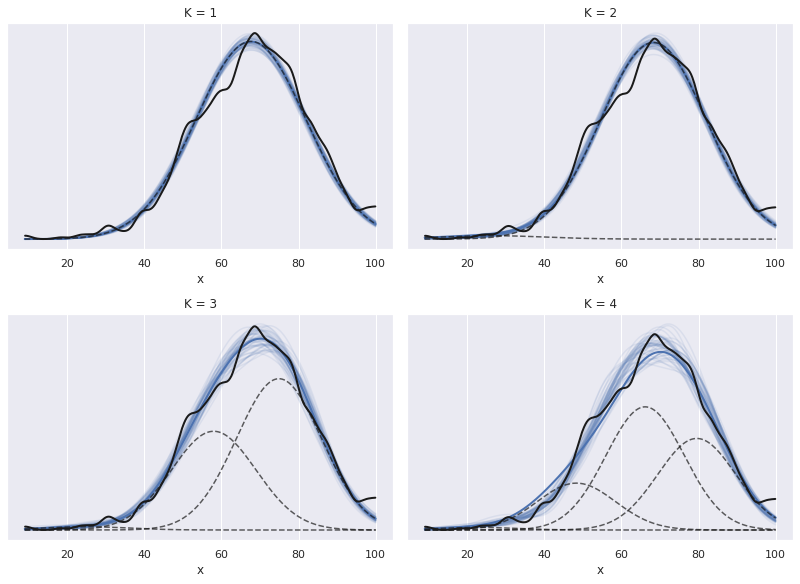

In [ ]:

_, ax = plt.subplots(2, 2, figsize=(11, 8), constrained_layout=True)
 
ax = np.ravel(ax)
x = np.linspace(score['avg'].min(), score['avg'].max(), 200)
for idx, trace_x in enumerate(traces):
    x_ = np.array([x] * clusters[idx]).T
 
    for i in range(50):
        i_ = np.random.randint(0, len(trace_x))
        means_y = trace_x['means'][i_]
        p_y = trace_x['p'][i_]
        sd = trace_x['sd'][i_]
        dist = stats.norm(means_y, sd)
        ax[idx].plot(x, np.sum(dist.pdf(x_) * p_y, 1), 'C0', alpha=0.1)
 
    means_y = trace_x['means'].mean(0)
    p_y = trace_x['p'].mean(0)
    sd = trace_x['sd'].mean()
    dist = stats.norm(means_y, sd)
    ax[idx].plot(x, np.sum(dist.pdf(x_) * p_y, 1), 'C0', lw=2)
    ax[idx].plot(x, dist.pdf(x_) * p_y, 'k--', alpha=0.7)
         
    az.plot_kde(score['avg'], plot_kwargs={'linewidth':2, 'color':'k'}, ax=ax[idx])
    ax[idx].set_title('K = {}'.format(clusters[idx]))
    ax[idx].set_yticks([])
    ax[idx].set_xlabel('x')
